In [1]:
from pyql.database.ql_database_interface import session
from pyql.database.ql_database_interface import Master
from pyql.database.ql_database_interface import UVIS_flt_0
from pyql.database.ql_database_interface import UVIS_flt_1
from pyql.database.ql_database_interface import IR_flt_0
from pyql.database.ql_database_interface import UVIS_spt_0
import os

In [4]:
#quarry for the data
result = session.query(Master.dir, Master.rootname,IR_flt_0.targname).\
          join(IR_flt_0).\
          filter(
              #IR_flt_0.targname == 'tungsten',
              IR_flt_0.filter == 'f105w',
              IR_flt_0.detector == 'ir',
              #IR_flt_0.imagetyp == 'flat',
              IR_flt_0.exptime > 600,
              IR_flt_0.proposid == '12025')
# Turn the roots and dirs into locations we can use later.
locales = ['{}_flt.fits'.format(os.path.join(item.dir, item.rootname)) for item in result]
targ=[item.targname for item in result]

In [2]:
#test data:
import numpy as np
from astropy.io import fits 
file='/grp/hst/wfc3a/GO_Links/12167/Visit05/ibhg05zhq_flt.fits'
hdulist=fits.open(file)
data=hdulist[1].data
hdulist.close()

In [3]:
print(data)

[[  0.82594508   0.7866621    0.81265229 ...,   7.71265268  14.50303841
   21.80039787]
 [  0.71375      0.82731837   0.75299376 ...,   0.75954807   9.40197563
   10.48038006]
 [  0.82437402   0.76987219   0.82455057 ...,   6.84428787  12.87138271
    7.23203564]
 ..., 
 [ 45.31053162  32.76496887  40.12654877 ...,  28.16431999  24.57474709
   25.10004425]
 [ 41.26448059  33.01760101  38.54203796 ...,  12.78504181  24.74819183
   36.74803162]
 [ 28.74943352  33.03342056  48.02711868 ...,   1.18139625  11.00234222
   30.77350044]]


In [9]:
help(Master)

Help on class Master in module pyql.database.ql_database_interface:

class Master(sqlalchemy.ext.declarative.api.Base)
 |  ORM for the  ``master`` table.
 |  
 |  Method resolution order:
 |      Master
 |      sqlalchemy.ext.declarative.api.Base
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_dict)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  detector
 |  
 |  dir
 |  
 |  first_ql_date
 |  
 |  id
 |  
 |  last_ql_date
 |  
 |  link
 |  
 |  proposal_type
 |  
 |  ql_root
 |  
 |  rootname
 |  
 |  single_asn
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __mapper__ = <Mapper at 0x106a20438; Master>
 |  
 |  __table__ = Table('master', MetaData(bind=Engine(mysql+pymys..., defau...
 |  
 |  __tablename__ = 'master'
 |  
 |  ---------------------------------------------------------------

In [10]:
help(IR_flt_0)

Help on class IR_FLT_0 in module pyql.database.ql_database_interface:

class IR_FLT_0(sqlalchemy.ext.declarative.api.Base)
 |  The most base type
 |  
 |  Method resolution order:
 |      IR_FLT_0
 |      sqlalchemy.ext.declarative.api.Base
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, header_dict)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  ang_side
 |  
 |  aperture
 |  
 |  asn_id
 |  
 |  asn_mtyp
 |  
 |  asn_tab
 |  
 |  atodgna
 |  
 |  atodgnb
 |  
 |  atodgnc
 |  
 |  atodgnd
 |  
 |  atodtab
 |  
 |  badinpdq
 |  
 |  biacfile
 |  
 |  biasfile
 |  
 |  biasleva
 |  
 |  biaslevb
 |  
 |  biaslevc
 |  
 |  biaslevd
 |  
 |  bitpix
 |  
 |  blevcorr
 |  
 |  bpixtab
 |  
 |  cal_ver
 |  
 |  ccdamp
 |  
 |  ccdgain
 |  
 |  ccdofsab
 |  
 |  ccdofscd
 |  
 |  ccdtab
 |  
 |  checksum
 |  
 |  comptab
 |  
 |  crcorr
 |  
 |  crds_ctx
 |  
 |  crds_ver
 |  
 |  crmas

In [3]:
#DQ
import numpy as np
data=np.array([[9.,12.,3.,5.],[6.,56.,6.,26.],[21.,30.,3.,38.],[7.,89.,22.,40.]])
dq0=np.array([[0,0,32,0,0,130,0,0,0,0,16,0,0,36],[0,0,128,0,0,0,0,0,4,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,6,0,0,0,0,0,0,0],[0,0,0,4,0,0,0,16,0,0,8,0,0,0],[0,0,32,0,0,0,0,0,16,0,0,0,0,128],[0,0,8,6,0,0,0,0,0,0,0,0,16,0],[0,32,0,0,0,0,0,4,0,128,0,0,16,0],[16,0,0,0,0,0,0,0,128,0,0,0,0,32]])
bit_mask = (4+16+32+128)
dq = np.bitwise_and(dq0,np.zeros(np.shape(dq0),'Int16')+ bit_mask)
dq==0
print(dq)

dq[dq>0]=1
#data[dq!=0]=np.nan
print(dq)


[[  0   0  32   0   0 128   0   0   0   0  16   0   0  36]
 [  0   0 128   0   0   0   0   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0  16   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0  16   0   0   0   0 128]
 [  0   0   0   4   0   0   0   0   0   0   0   0  16   0]
 [  0  32   0   0   0   0   0   4   0 128   0   0  16   0]
 [ 16   0   0   0   0   0   0   0 128   0   0   0   0  32]]
[[0 0 1 0 0 1 0 0 0 0 1 0 0 1]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1]]


In [8]:
mask=np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,1,1,0,0,0,0,0],[0,0,0,0,0,1,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,1,1,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
data=np.array([[.12,.13,.65,.9,.76,.89,0.83,0.09,0.93,0.65,0.84,0.96,0.83,0.94],[0.98,0.12,0.44,0.57,0.32,0.24,0.235,0.54,0.54,0.53,0.87,0.066,0.13,0.54],[0.54,0.54,0.23,0.26,0.2435,0.26,0.25,0.45,0.25,0.45,0.22,0.24,0.26,0.75],[0.35,0.24,0.83,0.55,0.42,0.23,1.25,1.23,1,0.23,0.24,0.43,0.22,0.74],[0.22,0.52,0.62,0.92,0.63,1.,1.,1.,1.,1.,0.22,0.32,0.75,0.66],[0.24,0.54,0.78,0.54,0.42,0.26,1.2,1.,1.,0.22,0.22,0.95,0.55,0.45],[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

print(mask)
mask[dq>0]=1
print(mask)
#mask[mask>0]=np.nan
#print(mask)
data[mask>0]=np.nan
print(data)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  

In [104]:
print(data)
print(dq)

[[    9 -9999     3 -9999]
 [    6    56 -9999    26]
 [   21 -9999     3 -9999]
 [-9999 -9999    22    40]]
[[  0   4   0   4]
 [  0   0  16   0]
 [  0  32   0 128]
 [ 32 132   0   0]]


In [2]:
import scipy
from scipy.stats import sigmaclip
from scipy.ndimage import gaussian_filter

clip,low,high=sigmaclip(data)
s=clip.std()

k = np.array([[1,1,1],[1,1,1],[1,1,1]])
from scipy import ndimage
data_test=ndimage.convolve(data, k, mode='constant', cval=0.0)
#sigma = gaussian_fwhm_to_sigma
#print(sigma)
#data_test=scipy.ndimage.filters.gaussian_filter(data, sigma)

In [7]:
def con(data):
    from astropy.convolution import convolve
    kernel=[[1,1,1],[1,1,1,],[1,1,1]]
    test=convolve(data, kernel, boundary='fill', fill_value=1.0, nan_treatment='interpolate')
    return(test)

[[  0   0   0 ...,   3   3   3]
 [  0   0   0 ...,   0   3   3]
 [  0   0   0 ...,   3   3   3]
 ..., 
 [355 355 355 ..., 366 366 366]
 [355 355 355 ..., 366 366 366]
 [355 355 355 ..., 366 366 366]]


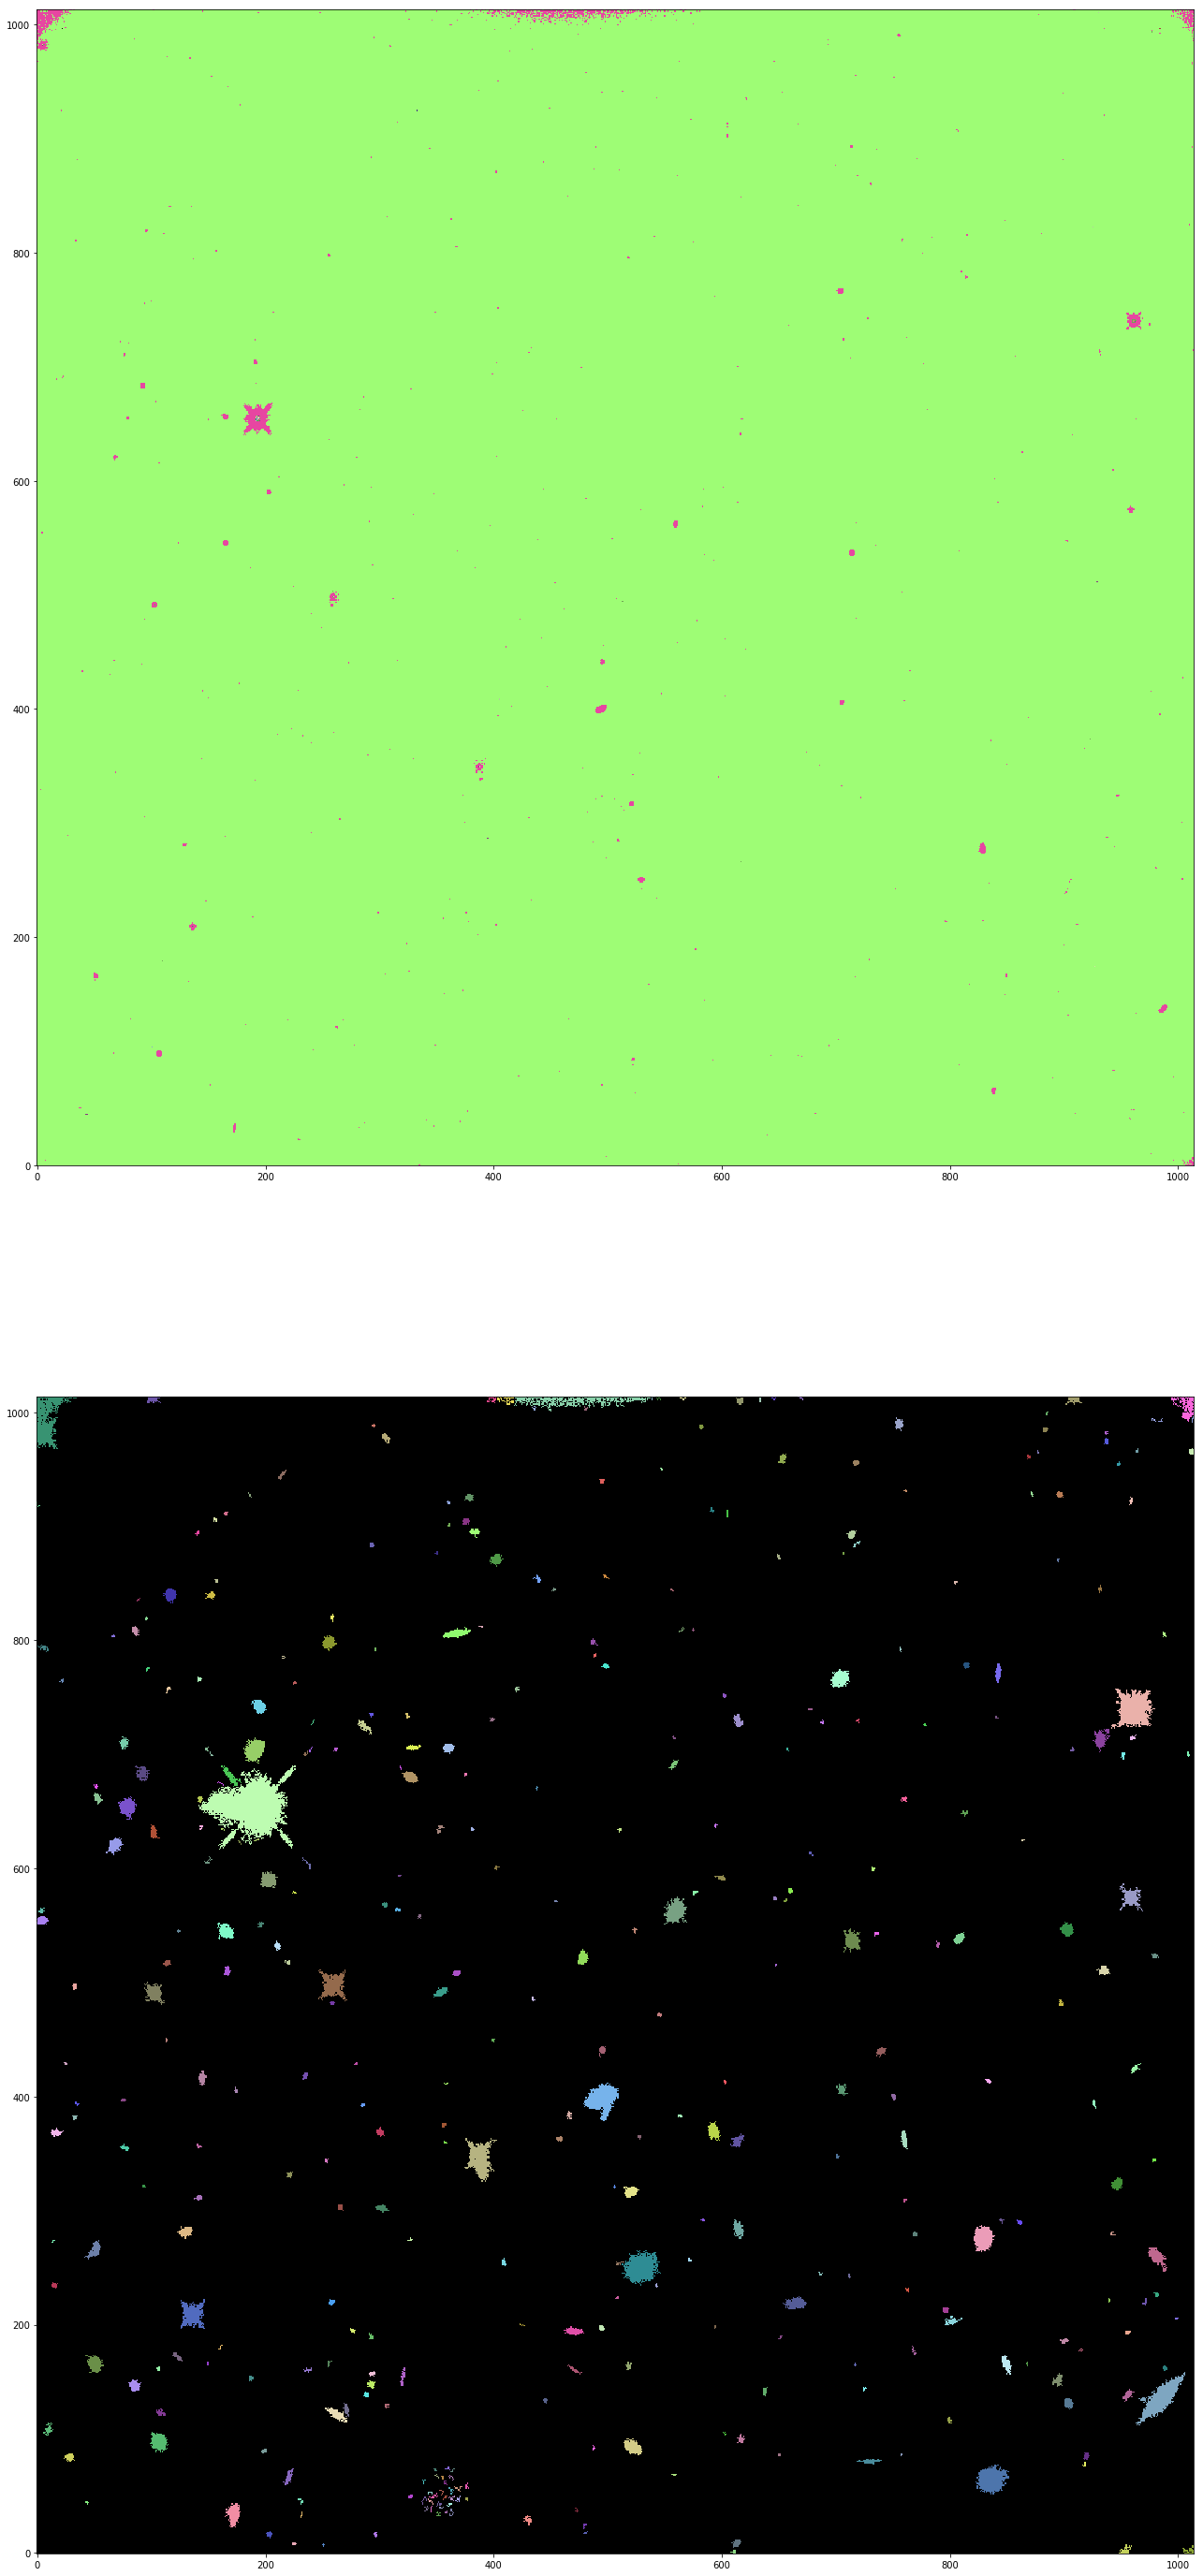

In [4]:
%matplotlib inline
import numpy as np
from astropy.io import fits
#data=np.array([[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,26.,1.,1.,1.,1.,1.,1.,1.,20.,1.],[1.,1.,1.,1.,20.,30.,15.,1.,1.,1.,1.,1.,15.,56.,10.],[1.,1.,1.,1.,1.,20.,1.,1.,1.,1.,1.,1.,8.,20.,5.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]])
#hdulist=fits.open(locales[3])
#data=hdulist[1].data
#hdulist.close()
from photutils import detect_threshold
threshold = detect_threshold(data, snr=3.)
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
sigma = 2.0 * gaussian_fwhm_to_sigma    # FWHM = 2.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(data, threshold, npixels=5)#, filter_kernel=kernel)

import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(data, origin='lower',cmap=segm.cmap(random_state=12345))# cmap='Greys_r', norm=norm)
ax2.imshow(segm, origin='lower', cmap=segm.cmap(random_state=12345))
print(segm.array)

In [7]:
help(segm)
#can I make this a boolian?

Help on SegmentationImage in module photutils.segmentation.core object:

class SegmentationImage(builtins.object)
 |  Class for a segmentation image.
 |  
 |  Parameters
 |  ----------
 |  data : array_like (int)
 |      A 2D segmentation image where sources are labeled by different
 |      positive integer values.  A value of zero is reserved for the
 |      background.
 |  
 |  Methods defined here:
 |  
 |  __array__(self)
 |      Array representation of the segmentation image (e.g., for
 |      matplotlib).
 |  
 |  __init__(self, data)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  area(self, labels)
 |      The areas (in pixel**2) of the regions for the input labels.
 |      
 |      Parameters
 |      ----------
 |      labels : int, array-like (1D, int)
 |          The label(s) for which to return areas.
 |      
 |      Returns
 |      -------
 |      areas : `~numpy.ndarray`
 |          The areas of the labeled regions.
 |  
 |  check_label(se

0.0466937
0.424660900144
4.24660900144
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


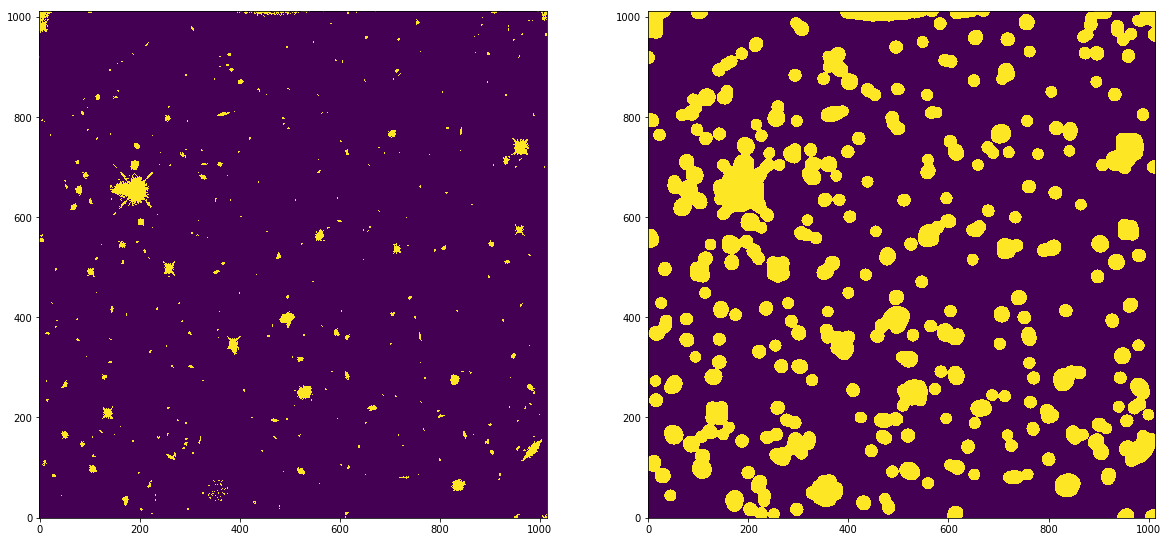

In [5]:
import scipy
from scipy.stats import sigmaclip
from scipy.ndimage import gaussian_filter
maps=segm.array
maps[maps>0]=1000
#print(maps)
clip,low,high=sigmaclip(data)
s=clip.std()

k = np.array([[1,1,1],[1,1,1],[1,1,1]])
from scipy import ndimage
#im1=ndimage.convolve(maps, k, mode='constant', cval=0.0)
#im1[im1>0]=1
#im2=ndimage.convolve(im1, k, mode='constant', cval=0.0)
#im2[im2>0]=1
#im3=ndimage.convolve(im2, k, mode='constant', cval=0.0)
#im3[im3>0]=1
#im4=ndimage.convolve(im3, k, mode='constant', cval=0.0)
#im4[im4>0]=1
#im5=ndimage.convolve(im4, k, mode='constant', cval=0.0)
#im5[im5>0]=1
#im6=ndimage.convolve(im5, k, mode='constant', cval=0.0)
#im6[im6>0]=1
#im7=ndimage.convolve(im6, k, mode='constant', cval=0.0)
#im7[im7>0]=1
#im8=ndimage.convolve(im7, k, mode='constant', cval=0.0)
#im8[im8>0]=1
#im9=ndimage.convolve(im8, k, mode='constant', cval=0.0)
#im9[im9>0]=1
#im=ndimage.convolve(im9, k, mode='constant', cval=0.0)
print(clip.std())
print(gaussian_fwhm_to_sigma)
#sigma = gaussian_fwhm_to_sigma
sigma=10.0 * gaussian_fwhm_to_sigma
print(sigma)
im=scipy.ndimage.gaussian_filter(maps, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
#im=1/im
#im[im<0.0]=0
#im[im>30]=3000
#im[im>20]=2500
#im[im>10]=2000
#im[im>5]=1500
#im[im>4]=1000
#im[im>3]=500
#im[im>2]=250
im[im>0]=1
#im[im>0.75]=150


#sigma = gaussian_fwhm_to_sigma
#print(sigma)
#test=data
#test[data<1]=0
#test[maps<1]=0
#print(test)

clip,low,high=sigmaclip(data)
s=clip.std()
#print(s)
#data2=data
#data2[maps<1]=0
#sigma=(np.std(data))#*0.002
#print(np.std(data))
#g_filt=scipy.ndimage.filters.gaussian_filter(maps, s)
#g_filt=scipy.ndimage.filters.gaussian_filter(data, sigma)
#print(g_filt)
#gmaps=g_filt
#gmaps[gmaps<0.7]=0
#gmaps[g_filt>0]=1

#print(gmaps)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.imshow(maps, origin='lower')
#ax1.set_ylim([600, 800])
#ax1.set_xlim([100, 300])
ax2.imshow(im, origin='lower')
#ax2.set_ylim([600, 800])
#ax2.set_xlim([100, 300])
#ax2.imshow(gmaps, origin='lower')
#ax2.set_ylim([600, 800])
#ax2.set_xlim([100, 300])
print(im)

In [4]:
print(maps)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
import skimage.morphology as morph
from skimage.morphology import disk
print(maps)
data_grown = morph.dilation(maps.byteswap().newbyteorder('='), disk(5))
print(data_grown)
data_grown[data_grown>0]=1
print(data_grown)

[[   0    0    0 ..., 1000 1000 1000]
 [   0    0    0 ...,    0 1000 1000]
 [   0    0    0 ..., 1000 1000 1000]
 ..., 
 [1000 1000 1000 ..., 1000 1000 1000]
 [1000 1000 1000 ..., 1000 1000 1000]
 [1000 1000 1000 ..., 1000 1000 1000]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


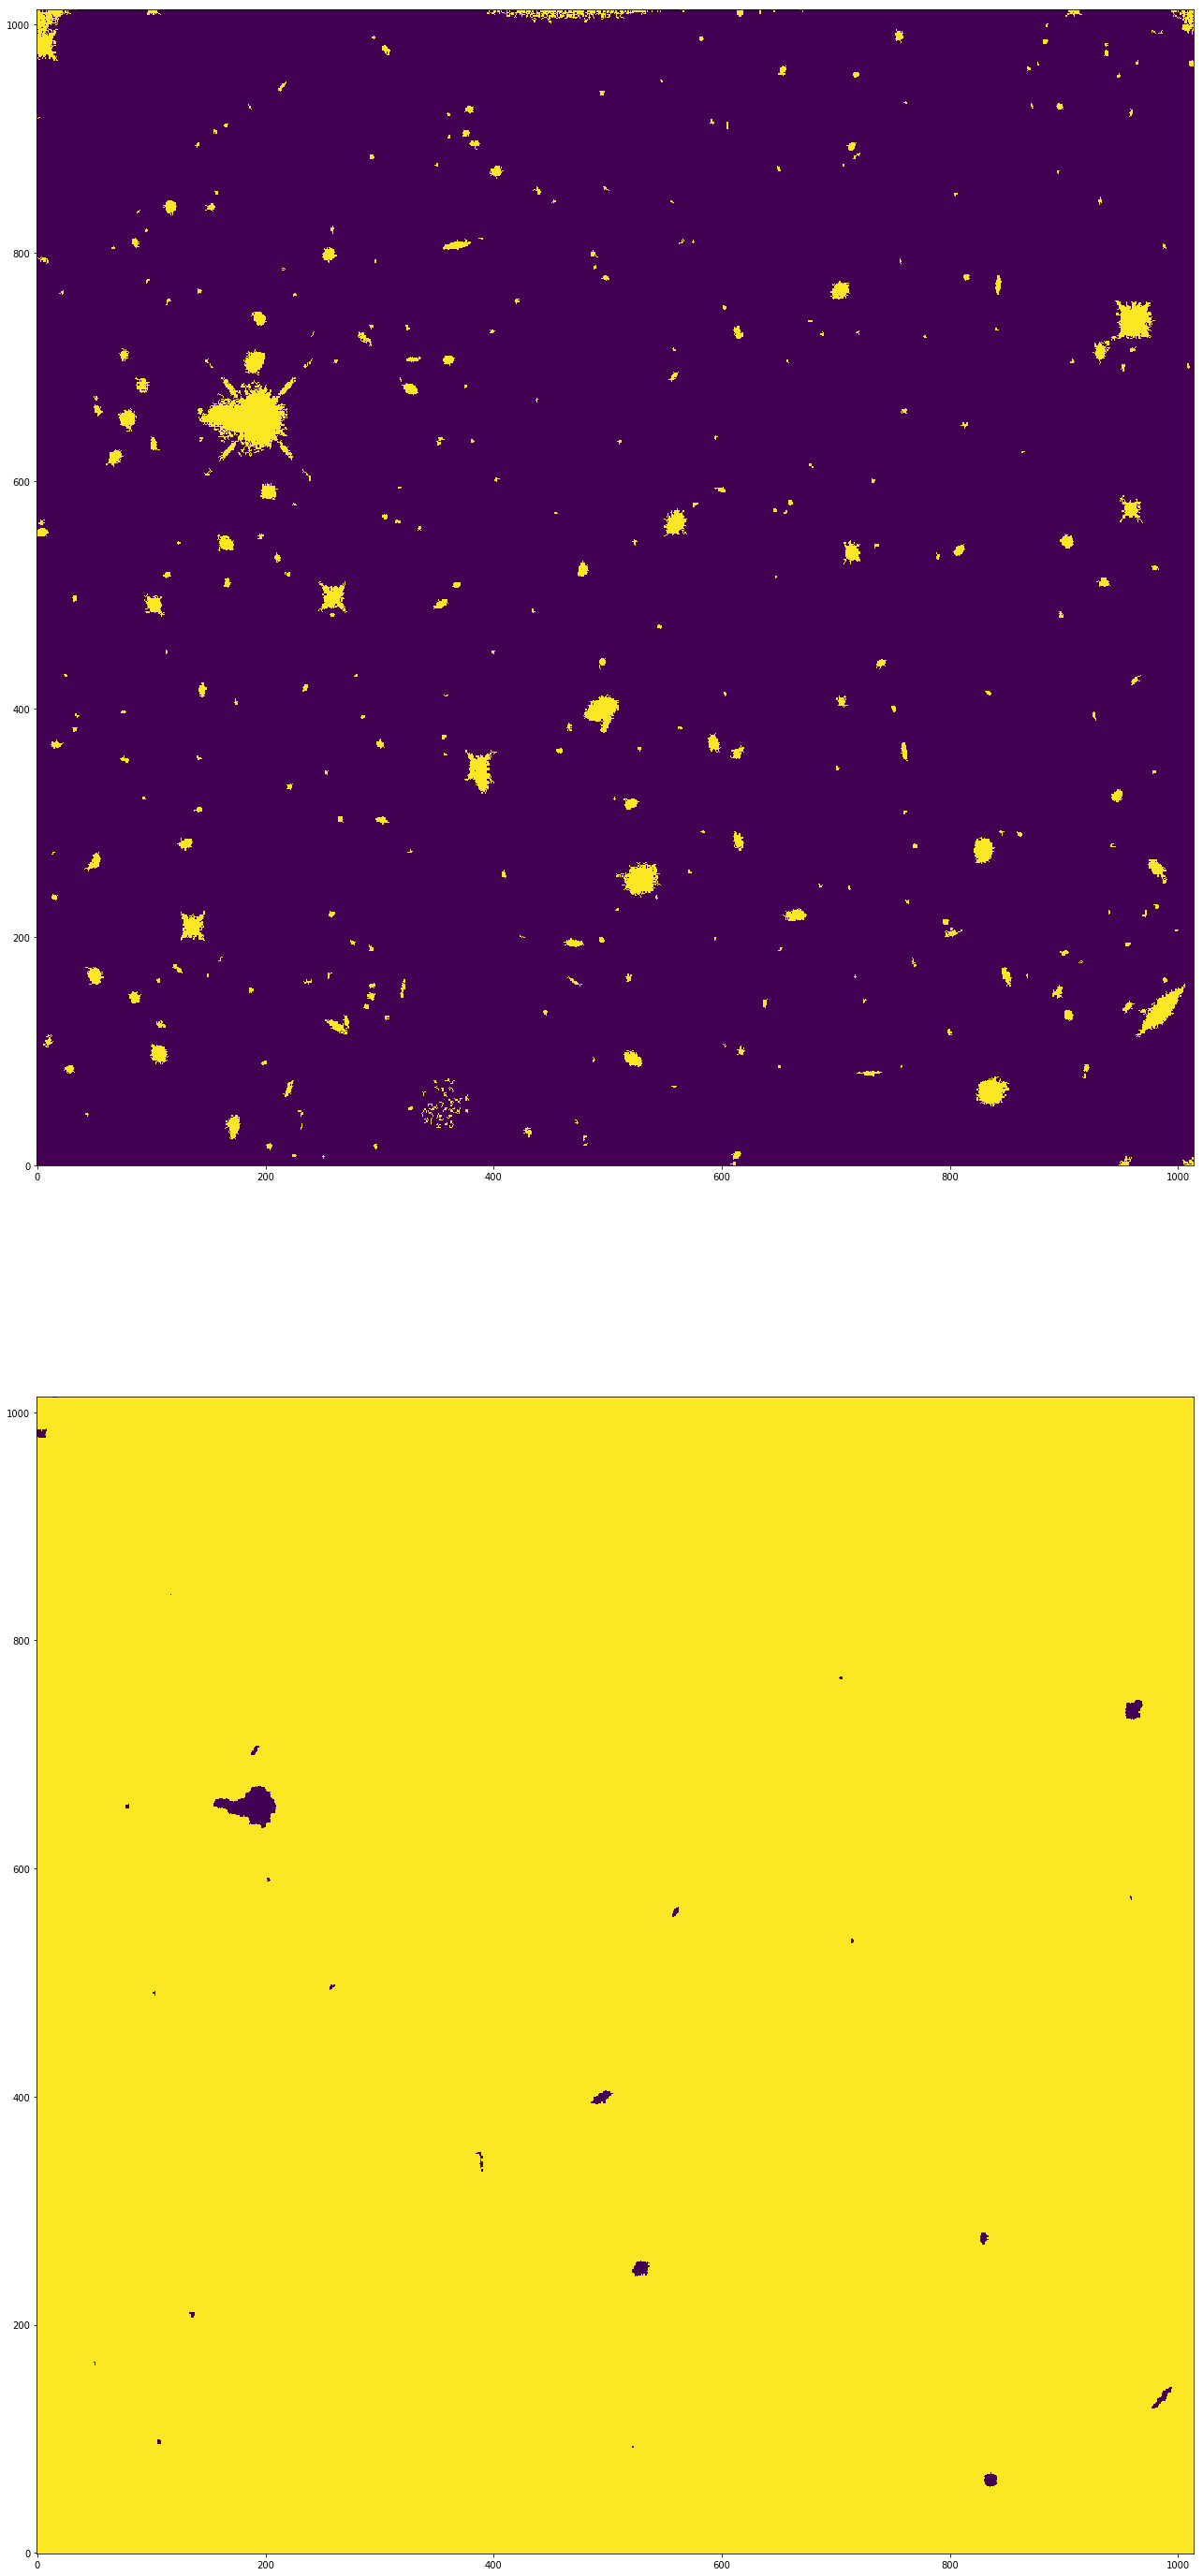

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(maps, origin='lower')
ax2.imshow(data_grown, origin='lower')

In [9]:
dq=fits.getdata(file, ext=3)
#print(dq)
bit_mask = (4+16+32+128+512)
dq0 = np.bitwise_and(dq,np.zeros(np.shape(dq),'Int16')+ bit_mask)
dq0==0
dq0[dq0>0]=1
#data_grown[dq0!=0]=np.nan
print(dq0)

im[dq0>0]=1
#print(data_grown)
data[im>0]=np.nan
print(data)


[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 0 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]
[[ 0.82594508  0.7866621   0.81265229 ...,         nan         nan
          nan]
 [ 0.71375     0.82731837  0.75299376 ...,         nan         nan
          nan]
 [ 0.82437402  0.76987219  0.82455057 ...,         nan         nan
          nan]
 ..., 
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]]


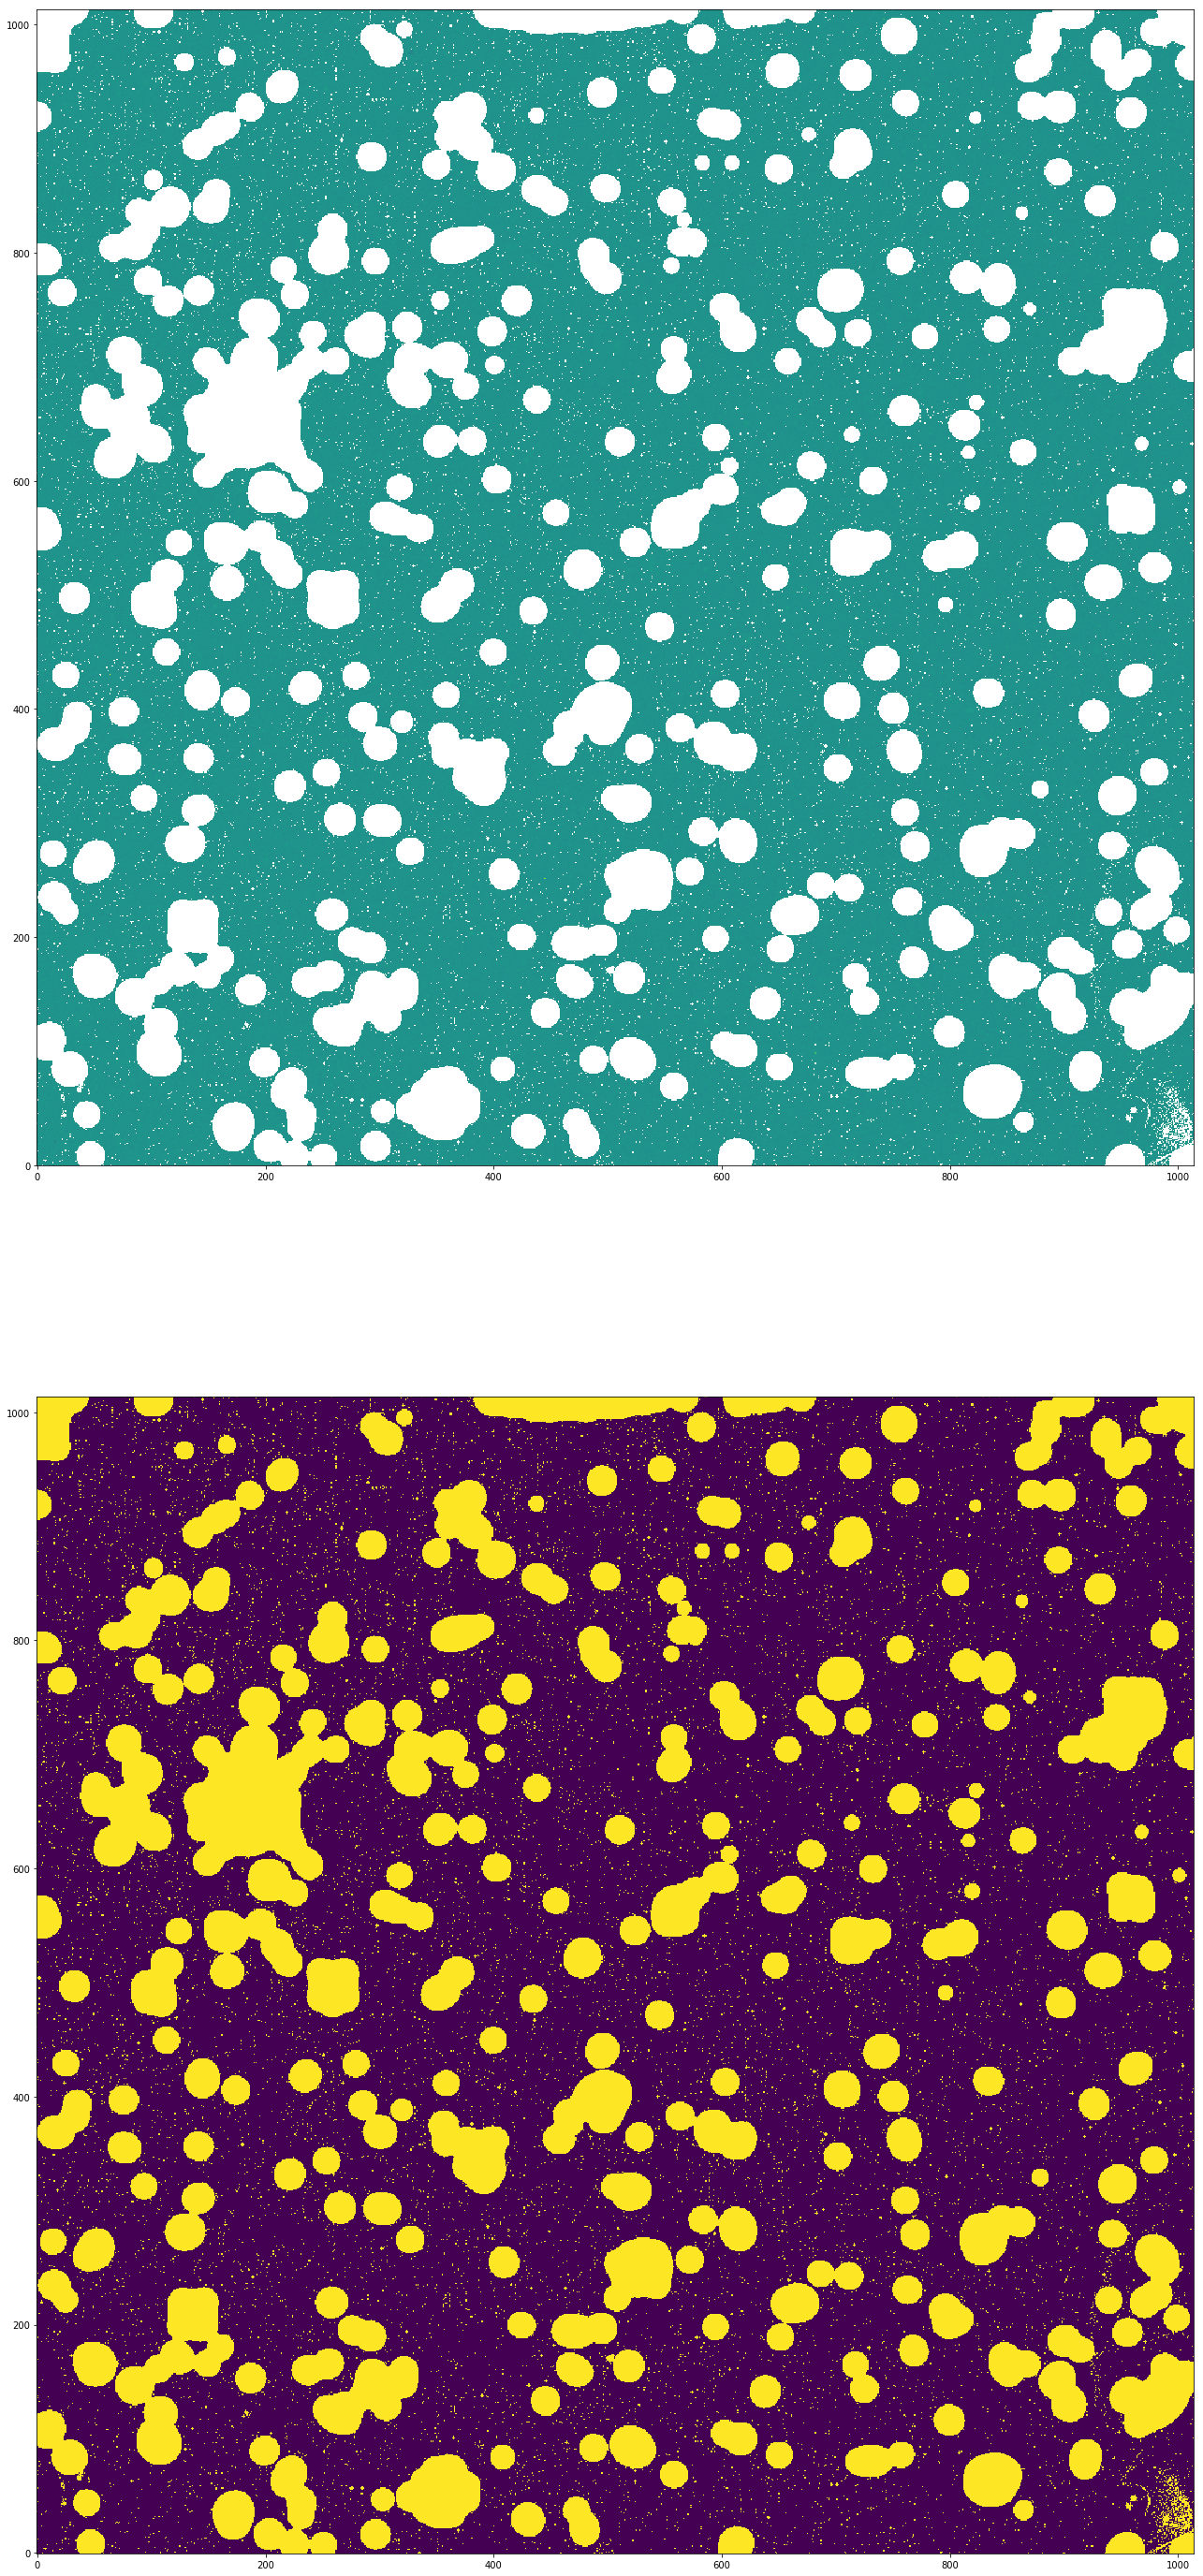

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(data, origin='lower')
ax2.imshow(im, origin='lower')

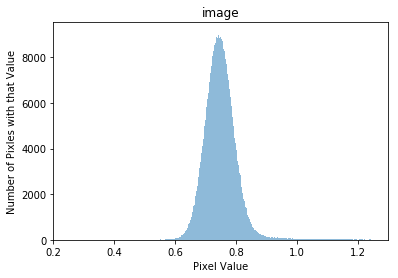

In [5]:
n, b, histogram=plt.hist(data.ravel(), bins=1000, range=(0.25, 1.25), alpha=.5)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixles with that Value')
plt.title('image')
plt.legend(loc='upper right')
#plt.show()

In [6]:
from scipy.stats import sigmaclip

values = data[~np.isnan(data)]
values, clow, chigh = sigmaclip(values, low=3, high=3)
mean = np.mean(values)
print(mean)
image=data/mean

0.740971


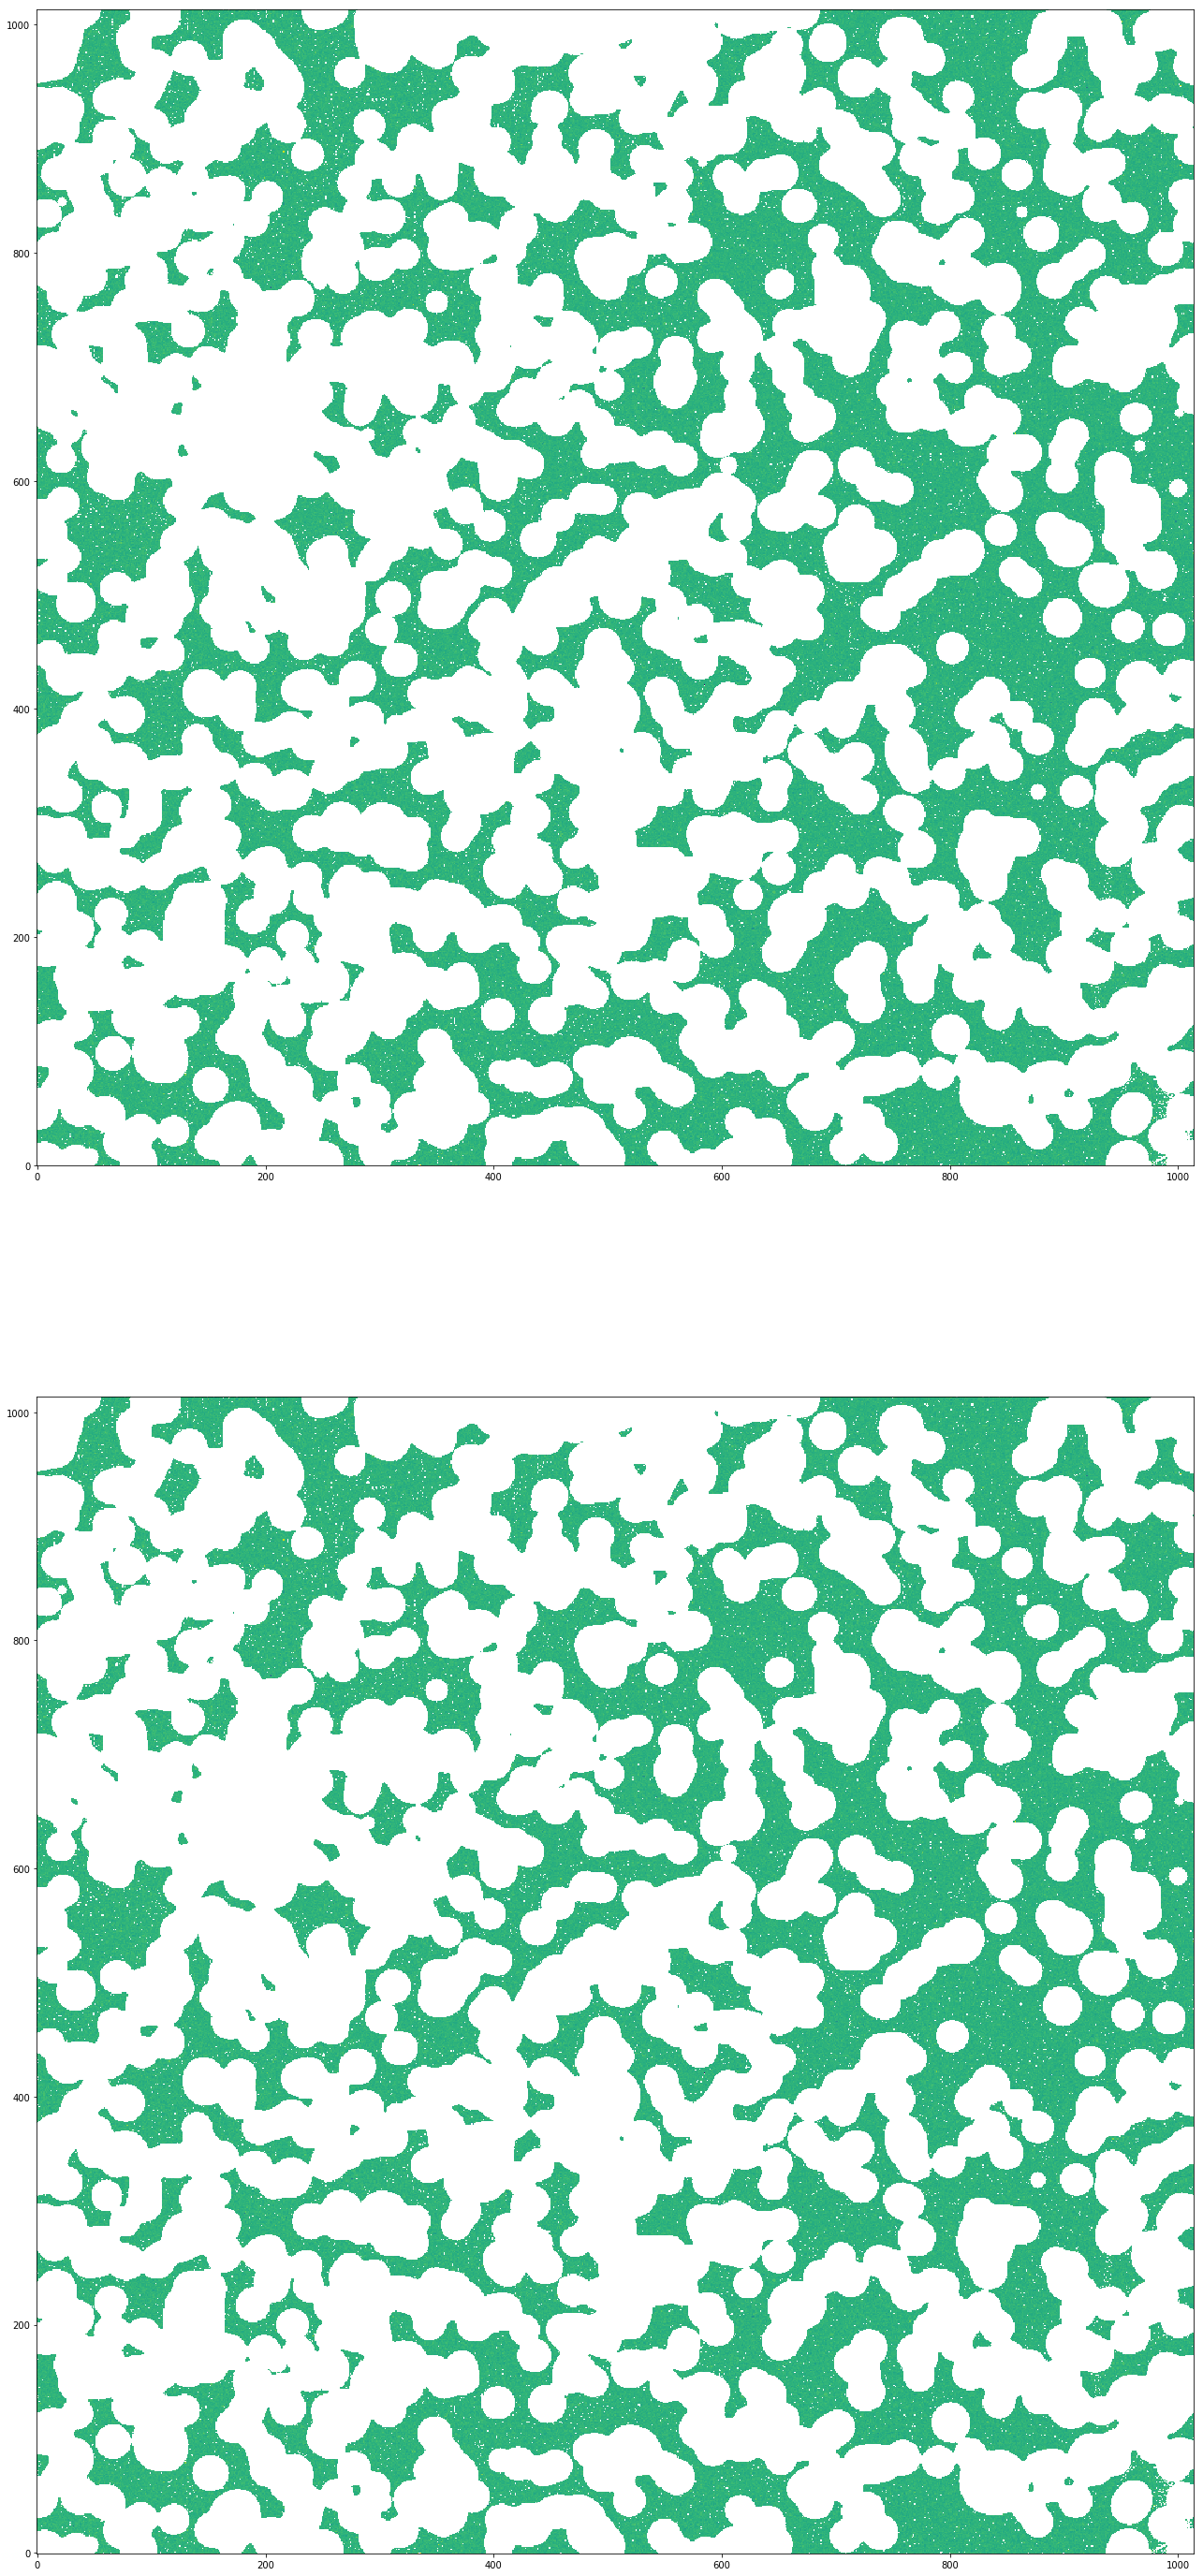

In [99]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(data, origin='lower')
ax2.imshow(image, origin='lower')

In [24]:
file_name=file[38:-8]+'mdi.fits'
fits.writeto(file_name, data,overwrite=True)

In [2]:
def find_sources(dat):

    threshold = detect_threshold(dat, snr=3.)
    sigma = 2.0 * gaussian_fwhm_to_sigma    # FWHM = 2.
    kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
    kernel.normalize()
    print(kernel)
    segm = detect_sources(dat, threshold, npixels=5)#, filter_kernel=kernel)
    return(segm)

In [4]:
seg=find_sources(data)

NameError: name 'detect_threshold' is not defined

In [24]:
print(seg.array)

[[   0    0    0 ...,    3    3    3]
 [   0    0    0 ...,    3    3    3]
 [   0    0    0 ...,    3    3    3]
 ..., 
 [1559 1559 1559 ..., 1588 1588 1588]
 [1559 1559 1559 ..., 1588 1588 1588]
 [1559 1559 1559 ..., 1588 1588 1588]]


In [8]:
tdat=con(data)
print(tdat)

[[  0.9065479    0.85733086   0.86294502 ...,   4.84161091   7.2521944
    6.56500959]
 [  0.85974067   0.7910189    0.7907477  ...,   7.02103615   9.78974438
    8.48419189]
 [  0.85234398   0.78051299   0.78394991 ...,   6.36114454   7.14609241
    5.33681297]
 ..., 
 [ 26.75947189  39.3724556   31.19172287 ...,  16.12153053  21.54900742
   15.6746521 ]
 [ 24.11497498  37.98244858  31.76220512 ...,  14.30286217  21.50791168
   17.10628319]
 [ 15.77259827  25.20944786  24.05718231 ...,   7.40985298  13.2425518
   11.88322258]]


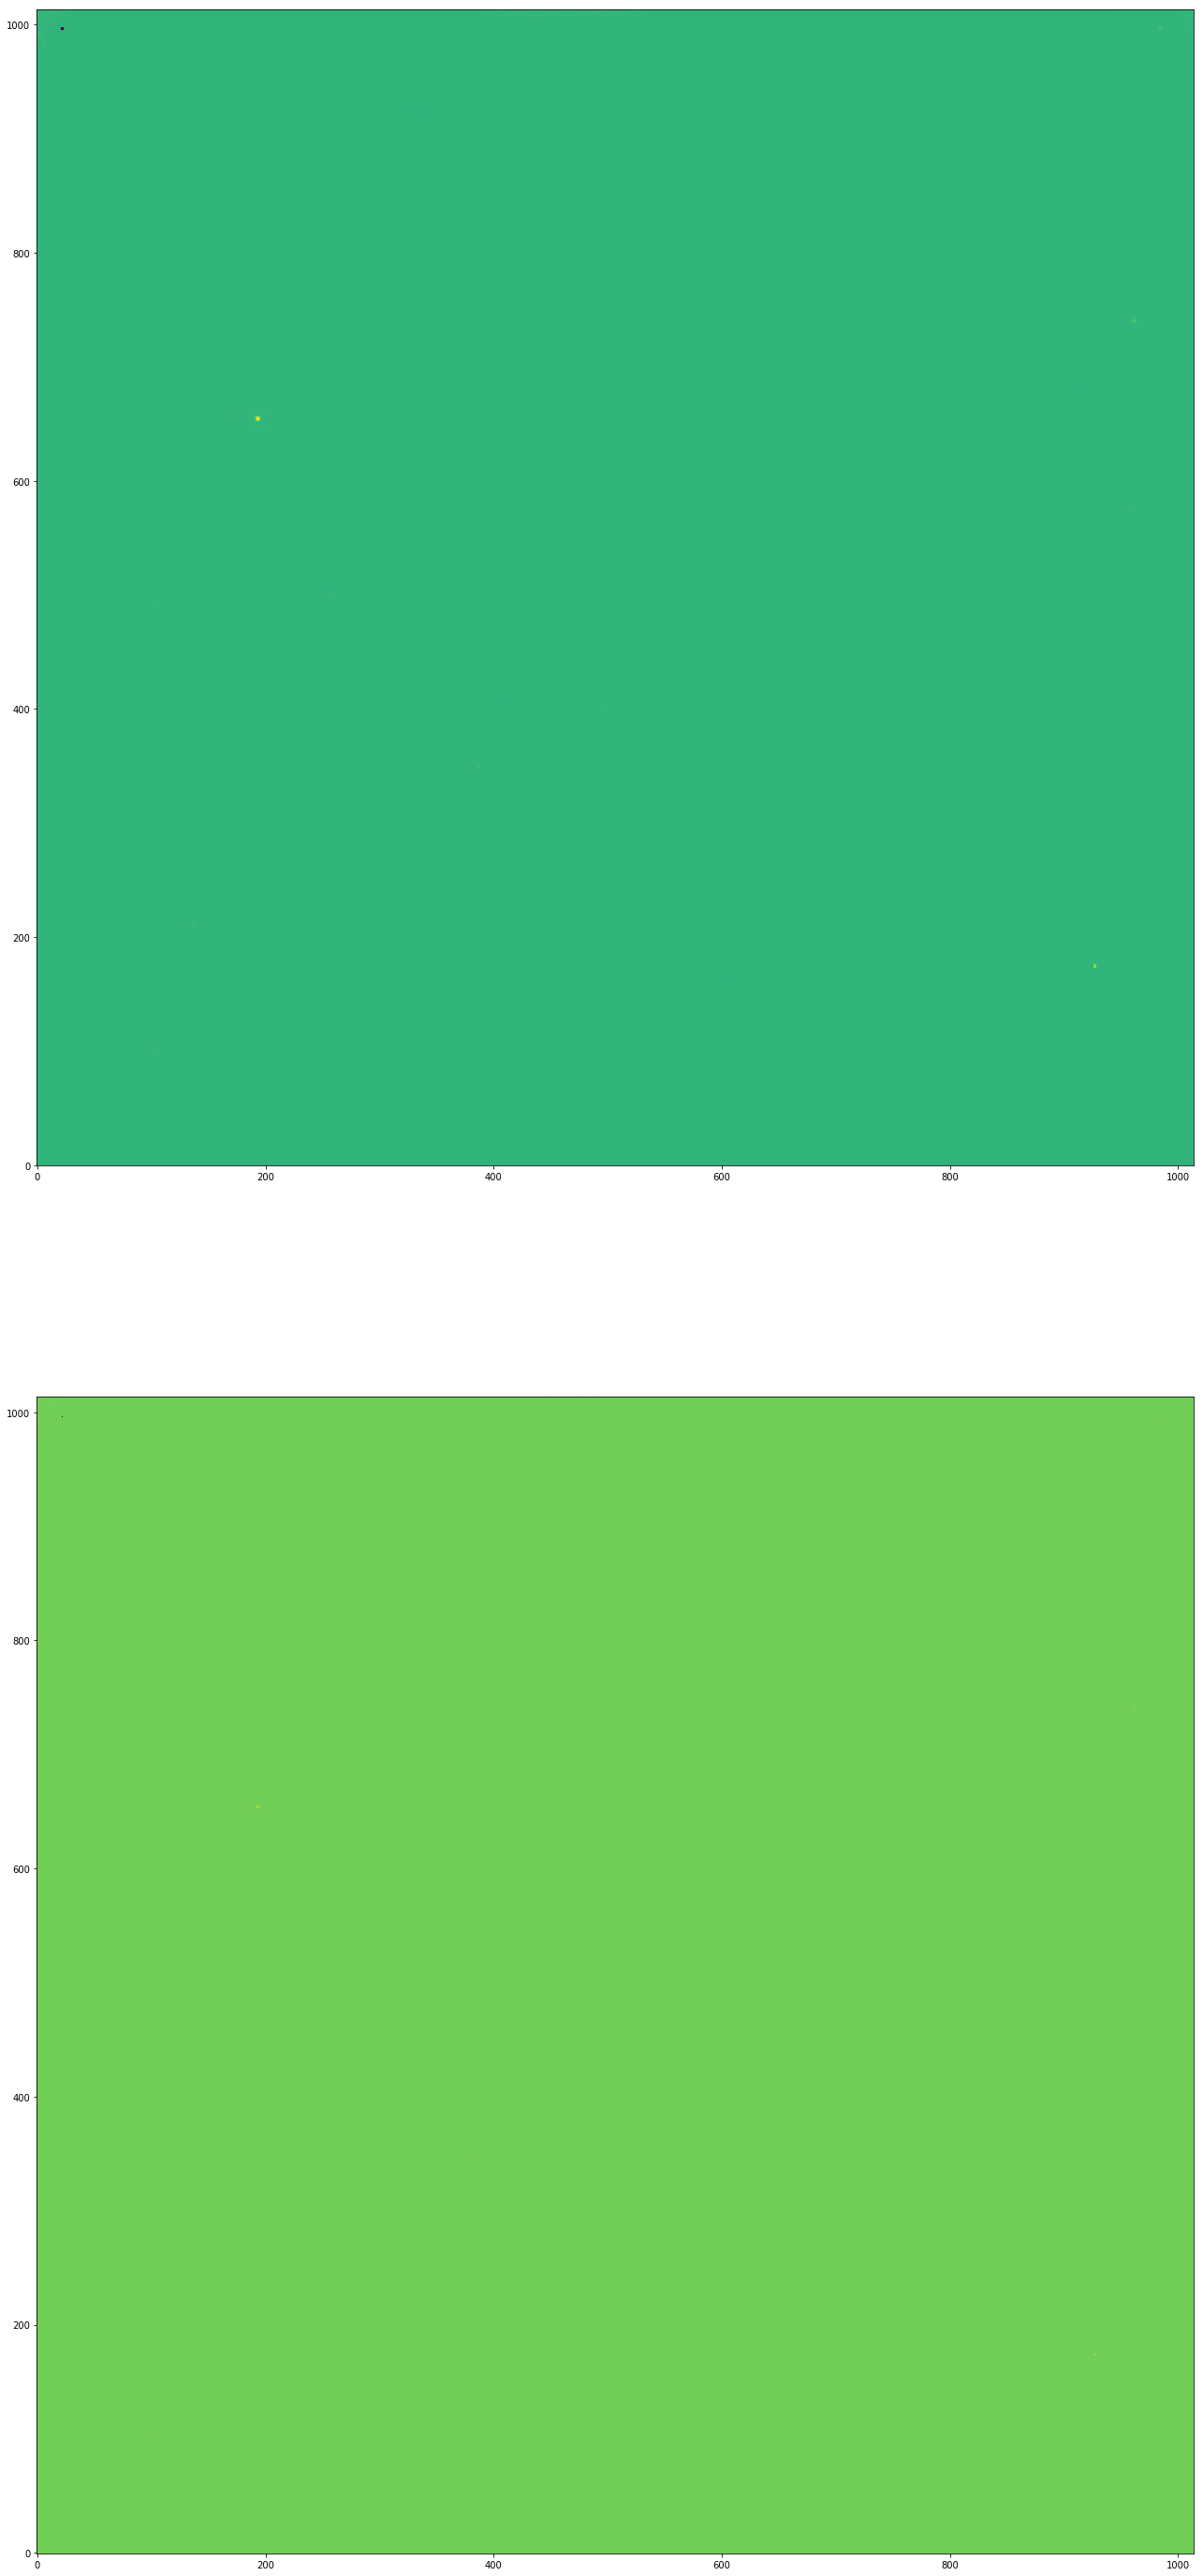

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(tdat, origin='lower')# cmap='Greys_r', norm=norm)
ax2.imshow(data, origin='lower')# cmap=segm.cmap(random_state=12345))

In [14]:
t=np.ones((3,3))

In [17]:
print(t.shape)

(3, 3)


In [2]:
from astropy.stats import sigma_clip

In [1]:
import numpy as np
from astropy.io import fits 

In [4]:
hdulist=fits.open('big_test_F160_10_median.fits')
data=hdulist[0].data

In [5]:
from scipy.signal import medfilt

In [6]:
mfilt=medfilt(data)

In [7]:
file_name='test_median_smooth.fits'
fits.writeto(file_name, mfilt,overwrite=True)

In [24]:
from scipy import stats
stats.mode(data)

ModeResult(mode=array([[ 0.60237747,  0.26832354,  0.57892191, ...,  0.52863544,
         0.75922805,  0.71874392]], dtype=float32), count=array([[1, 1, 1, ..., 1, 2, 2]]))

In [23]:
import pandas as pd
tes=data.ravel
df = pd.DataFrame({tes})
df.mode()

TypeError: unhashable type: 'numpy.ndarray'

In [25]:
a=[[2,4,3],[5,2,2],[1,2,3]]
print(np.mean(a))
print(np.mode(a))

2.66666666667


AttributeError: module 'numpy' has no attribute 'mode'